## Libraries

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt

#Libraries for Data Clean Up
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Libraries for Data Visualization
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

#Libraries for Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load DataFrame
df = pd.read_csv('/Users/gobinathsindhuja/Desktop/Prospa_assignment/supervised_learning_project/data/vehiclesFinal.csv')
df = df.drop(['Advertised_Date',"Sold_Date","Vehicle_Code"],axis=1)#remove non useful features for model
df2 = df.copy()
df.head()

,Odometer,Power,Fuel_Urban,Make_Code,Family_Code,Year_Group,Region_Description,Sale_Price
0,2200.0,184.0,9.3,JEEP,GRAND,2019.0,WA,60556.34
1,38674.0,184.0,9.3,JEEP,GRAND,2017.0,WA,39970.00
2,54627.0,200.0,13.9,JEEP,CHEROKE,2014.0,WA,19008.77
3,57984.0,184.0,9.3,JEEP,GRAND,2016.0,WA,39545.45
4,88793.0,125.0,9.4,FORD,FOCUS,2014.0,WA,8181.82


In [3]:
#Define numerical and categorical values
num_cols = ['Year_Group','Odometer','Power','Fuel_Urban']
cat_cols = ['Make_Code','Family_Code','Region_Description']

## 1. Transform Categorical Column Values into Integer Values

In [4]:
le = preprocessing.LabelEncoder()
df[cat_cols] = df[cat_cols].apply(le.fit_transform)

In [5]:
df.head()

,Odometer,Power,Fuel_Urban,Make_Code,Family_Code,Year_Group,Region_Description,Sale_Price
0,2200.0,184.0,9.3,20,176,2019.0,6,60556.34
1,38674.0,184.0,9.3,20,176,2017.0,6,39970.00
2,54627.0,200.0,13.9,20,88,2014.0,6,19008.77
3,57984.0,184.0,9.3,20,176,2016.0,6,39545.45
4,88793.0,125.0,9.4,9,156,2014.0,6,8181.82


## 2. Scale the Data Set

In [6]:
#Scale the numerical data
norm = StandardScaler()
df['Sale_Price'] = np.log(df['Sale_Price'])
df['Odometer'] = norm.fit_transform(np.array(df['Odometer']).reshape(-1,1))
df['Year_Group'] = norm.fit_transform(np.array(df['Year_Group']).reshape(-1,1))
df['Power'] = norm.fit_transform(np.array(df['Power']).reshape(-1,1))
df['Fuel_Urban'] = norm.fit_transform(np.array(df['Fuel_Urban']).reshape(-1,1))

#Scaling target variable
q1,q3 = (df['Sale_Price'].quantile([0.25,0.75]))
o1 = q1-1.5*(q3-q1)
o2 = q3+1.5*(q3-q1)
df = df[(df.Sale_Price >= o1) & (df.Sale_Price <= o2)]

In [7]:
df.head()

,Odometer,Power,Fuel_Urban,Make_Code,Family_Code,Year_Group,Region_Description,Sale_Price
0,-1.490202,2.028217,-0.201511,20,176,1.319164,6,11.011329
1,-0.735511,2.028217,-0.201511,20,176,0.649816,6,10.595884
2,-0.405424,2.589700,2.263995,20,88,-0.354206,6,9.852656
3,-0.335963,2.028217,-0.201511,20,176,0.315142,6,10.585206
4,0.301512,-0.042251,-0.147913,9,156,-0.354206,6,9.009670


In [8]:
#Function to split data set into training and test
def trainingData(df,n):
    X = df.iloc[:,n]
    y = df.iloc[:,-1:].values.T
    y = y[0]
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.9,test_size = 0.1,random_state = 0)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test = trainingData(df,list(range(len(list(df.columns))-1)))

In [9]:
#Some models will predict neg values so this function will remove those values
def remove_neg(y_test,y_pred):
    ind = [index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred = y_pred[ind]
    y_test = y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#Function for evaluation of model
def result(y_test,y_pred):
    r = []
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#DataFrame that stores the performance of each model
accu = pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])   

## 3. Model Implementation

> - a. Linear Regression
> - b. Ridge Regression
> - c. Lasso Regression
> - d. K-Neighbors Regressor
> - e. Random Forest Regressor
> - f. Bagging Regressor
> - g. Adaboost Regressor
> - h. XGBoost

## 3a. Linear Regression

In [10]:
#Best fit model
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [11]:
#Calculate error/accuracy
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr = result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression'] = r1_lr

Coefficients: 
 [-0.03485673  0.2804355  -0.07309853  0.00386527  0.00052722  0.28580943
  0.00780579]
MSLE : 0.000846250607128591
Root MSLE : 0.029090386850789574
R2 Score : 0.6678172854062833 or 66.7817%


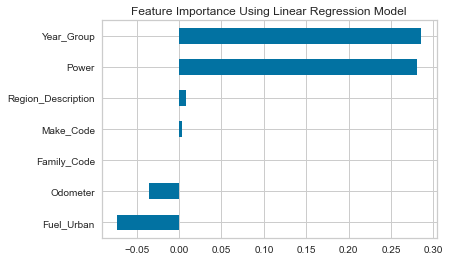

In [12]:
#Plot feature importance graph
coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature Importance Using Linear Regression Model")
plt.savefig('/Users/gobinathsindhuja/Desktop/Prospa_assignment/supervised_learning_project/assets/img/MachineLearning/Linear-Regression-Feature-Importance.jpg')
plt.show()

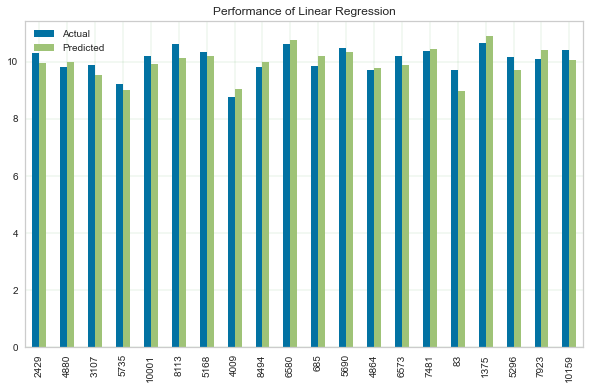

In [13]:
#Visualization of true value and predicted
df_check = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize = (10,6))
plt.grid(which ='major', linestyle ='-', linewidth ='0.1', color ='Green')
plt.title('Performance of Linear Regression')
plt.savefig('/Users/gobinathsindhuja/Desktop/Prospa_assignment/supervised_learning_project/assets/img/MachineLearning/Linear-Regression-Performance')
plt.show()

### 3b. Ridge regression

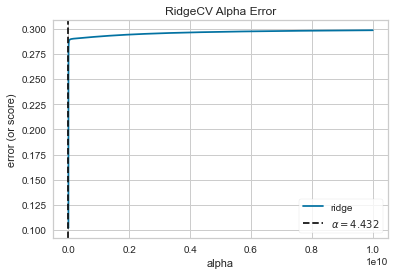

<AxesSubplot:title={'center':'RidgeCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [14]:
#Predicting alpha value
alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas = alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train,y_train)
visualizer.show()

In [15]:
#Model object and fit model
RR=Ridge(alpha = 20.336,solver ='auto')
RR.fit(X_train,y_train)
y_pred = RR.predict(X_test)

In [16]:
#Model evaluation
y_test_2,y_pred_2 = remove_neg(y_test,y_pred)
r2_ridge = result(y_test_2,y_pred_2)
print("MSLE : {}".format(r2_ridge[0]))
print("Root MSLE : {}".format(r2_ridge[1]))
print("R2 Score : {} or {}%".format(r2_ridge[2],r2_ridge[3]))
accu['Ridge Regression'] = r2_ridge

MSLE : 0.0008462509091173738
Root MSLE : 0.029090392041314497
R2 Score : 0.6678165665246123 or 66.7817%


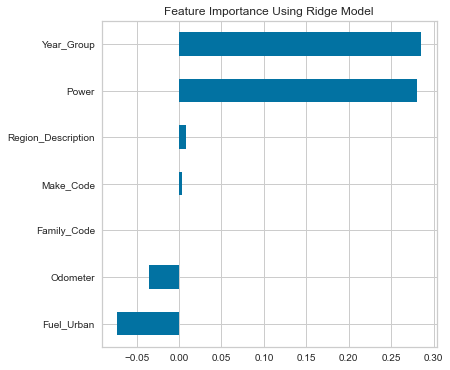

In [17]:
#Feature Importance graph
coef = pd.Series(RR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature Importance Using Ridge Model")
plt.savefig('/Users/gobinathsindhuja/Desktop/Prospa_assignment/supervised_learning_project/assets/img/MachineLearning/Ridge-Regression-Feature-Importance.jpg')
plt.show()

### 3c. Lasso Regression

In [18]:
#Model object and fit
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)

In [19]:
#Model evaluation
y_test_3,y_pred_3 = remove_neg(y_test,y_pred)
r3_lasso = result(y_test_3,y_pred_3)
print("MSLE : {}".format(r3_lasso[0]))
print("Root MSLE : {}".format(r3_lasso[1]))
print("R2 Score : {} or {}%".format(r3_lasso[2],r3_lasso[3]))
accu['Lasso']=r3_lasso

MSLE : 0.0008462727954668625
Root MSLE : 0.029090768217200153
R2 Score : 0.6678070914566148 or 66.7807%


### 3d. KNN

In [20]:
#Estimate MSLE for k=1-9
R_MSLE = []
for i in range(1,10):
    KNN = KNeighborsRegressor(n_neighbors = i)
    KNN.fit(X_train,y_train)
    y_pred = KNN.predict(X_test)
    error = np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

K = 1  , Root MSLE = 0.017766807544813284
K = 2  , Root MSLE = 0.015764793245861775
K = 3  , Root MSLE = 0.015246750967044934
K = 4  , Root MSLE = 0.014954741417266635
K = 5  , Root MSLE = 0.014824212017340752
K = 6  , Root MSLE = 0.014760518343558167
K = 7  , Root MSLE = 0.014763507780539014
K = 8  , Root MSLE = 0.014808689733008461
K = 9  , Root MSLE = 0.014857345089345478


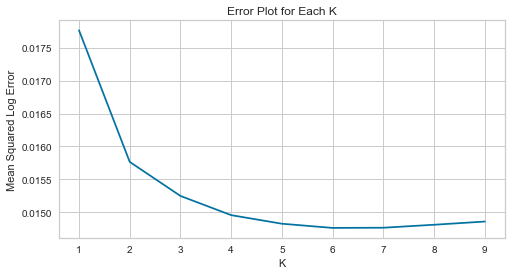

In [21]:
#Plotting error
curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,10)), list(range(1,10)), rotation='horizontal')
plt.plot(list(range(1,10)),R_MSLE)
plt.xlabel('K')
plt.ylabel('Mean Squared Log Error')
plt.title('Error Plot for Each K')
plt.savefig('/Users/gobinathsindhuja/Desktop/Prospa_assignment/supervised_learning_project/assets/img/MachineLearning/KNN-Error-Plot.jpg')
plt.show()

In [22]:
#Model implementation
KNN = KNeighborsRegressor(n_neighbors=5) 
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)

In [23]:
#Model evaluation
r4_knn=result(y_test,y_pred)
print("MSLE : {}".format(r4_knn[0]))
print("Root MSLE : {}".format(r4_knn[1]))
print("R2 Score : {} or {}%".format(r4_knn[2],r4_knn[3]))
accu['KNeighbors Regressor']=r4_knn

MSLE : 0.00021975726193506996
Root MSLE : 0.014824212017340752
R2 Score : 0.9167288291956442 or 91.6729%


In [24]:
accu.to_csv('/Users/gobinathsindhuja/Desktop/Prospa_assignment/supervised_learning_project/reports/errors.csv')

### 3e. Random Forest

In [25]:
RFR = RandomForestRegressor(n_estimators=200,random_state=0, min_samples_leaf=1, 
                            max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)

In [26]:
r5_rf=result(y_test,y_pred)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
accu['RandomForest Regressor']=r5_rf

MSLE : 0.00018668928130895427
Root MSLE : 0.013663428607379418
R2 Score : 0.9293523440823636 or 92.9352%


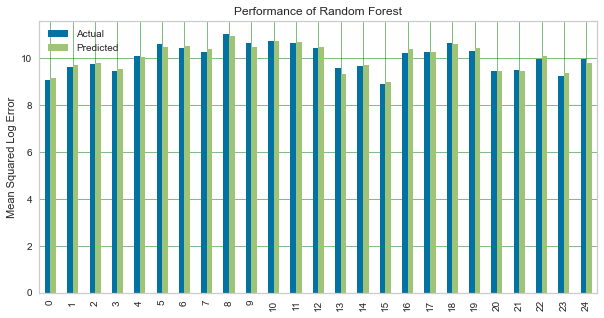

In [27]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.savefig('/Users/gobinathsindhuja/Desktop/Prospa_assignment/supervised_learning_project/assets/img/MachineLearning/Random-Forest-Performance.jpg')
plt.show()

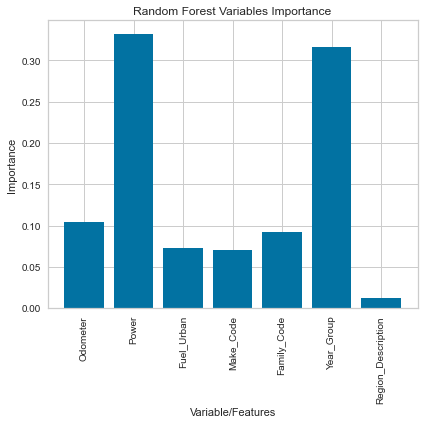

In [28]:
importances=RFR.feature_importances_
features=X_train.columns

# List of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances)
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('/Users/gobinathsindhuja/Desktop/Prospa_assignment/supervised_learning_project/assets/img/MachineLearning/Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();

### 3f. Bagging Regressor

In [29]:
#Model implementation
baggReg = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(X_train,y_train)
y_pred=baggReg.predict(X_test)

In [30]:
#Model evaluation
r6_br=result(y_test,y_pred)
print("MSLE : {}".format(r6_br[0]))
print("Root MSLE : {}".format(r6_br[1]))
print("R2 Score : {} or {}%".format(r6_br[2],r6_br[3]))

MSLE : 0.00028041179085297913
Root MSLE : 0.016745500615179564
R2 Score : 0.8943483726405516 or 89.4348%


In [31]:
accu['Bagging Regressor']=r6_br
accu.to_csv('/Users/gobinathsindhuja/Desktop/Prospa_assignment/supervised_learning_project/reports/errors.csv')

### 3g. Adaboost

In [32]:
#Model implementation
ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6)

ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)

In [33]:
#Model evaluation
r7_ab=result(y_test,y_pred)
print("MSLE : {}".format(r7_ab[0]))
print("Root MSLE : {}".format(r7_ab[1]))
print("R2 Score : {} or {}%".format(r7_ab[2],r7_ab[3]))

MSLE : 0.0001951612723818725
Root MSLE : 0.013970013327906044
R2 Score : 0.9262897725699563 or 92.629%


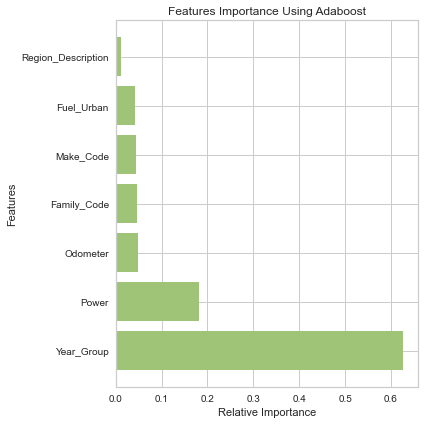

In [34]:
importances = ABR.feature_importances_
features = X_train.columns

indices = np.argsort(importances)
indices = [x for x in reversed(indices)]
plt.figure(1)
plt.title('Features Importance Using Adaboost')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('/Users/gobinathsindhuja/Desktop/Prospa_assignment/supervised_learning_project/assets/img/MachineLearning/Adaboost-Features-Importance2.jpg',dpi=60)
plt.show();

In [35]:
accu['AdaBoost Regressor']=r7_ab
accu.to_csv('/Users/gobinathsindhuja/Desktop/Prospa_assignment/supervised_learning_project/reports/errors.csv')

### 3h. XGBoost

In [36]:
#Model implementation and fitting data
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [37]:
#Model evaluation
y_test_1,y_pred_1 = remove_neg(y_test,y_pred)
r8_xg = result(y_test_1,y_pred_1)
print("MSLE : {}".format(r8_xg[0]))
print("Root MSLE : {}".format(r8_xg[1]))
print("R2 Score : {} or {}%".format(r8_xg[2],r8_xg[3]))

MSLE : 0.00017184439401514328
Root MSLE : 0.013108943283695421
R2 Score : 0.9348410621328321 or 93.4841%


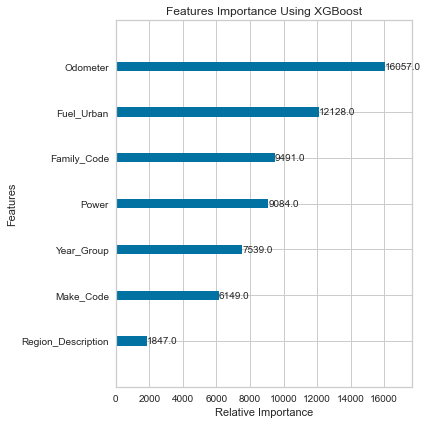

In [38]:
#Plot Feature Importance Graph
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.tight_layout()
plt.title('Features Importance Using XGBoost')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.savefig('/Users/gobinathsindhuja/Desktop/Prospa_assignment/supervised_learning_project/assets/img/MachineLearning/XGBoost-Features-Importance.jpg')
plt.show()

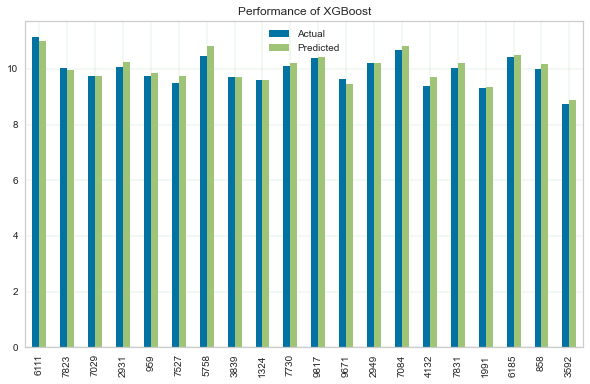

In [39]:
#Visualization of true value and predicted
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize = (10,6))
plt.grid(which ='major', linestyle ='-', linewidth ='0.1', color ='Green')
plt.title('Performance of XGBoost')
plt.savefig('/Users/gobinathsindhuja/Desktop/Prospa_assignment/supervised_learning_project/assets/img/MachineLearning/XGBoost-Performance')
plt.show()

In [40]:
accu['XGBoost']=r8_xg
accu.to_csv('/Users/gobinathsindhuja/Desktop/Prospa_assignment/supervised_learning_project/reports/errors.csv')

## Overall Result

In [41]:
accu = pd.read_csv('/Users/gobinathsindhuja/Desktop/Prospa_assignment/supervised_learning_project/reports/errors.csv',index_col=0)
accu

,Linear Regression,Ridge Regression,Lasso,KNeighbors Regressor,RandomForest Regressor,Bagging Regressor,AdaBoost Regressor,XGBoost
MSLE,0.000846,0.000846,0.000846,0.000220,0.000187,0.000280,0.000195,0.000172
Root MSLE,0.029090,0.029090,0.029091,0.014824,0.013663,0.016746,0.013970,0.013109
R2 Score,0.667817,0.667817,0.667807,0.916729,0.929352,0.894348,0.926290,0.934841
Accuracy(%),66.781700,66.781700,66.780700,91.672900,92.935200,89.434800,92.629000,93.484100


In [42]:
model_accuracy=accu.loc['Accuracy(%)']

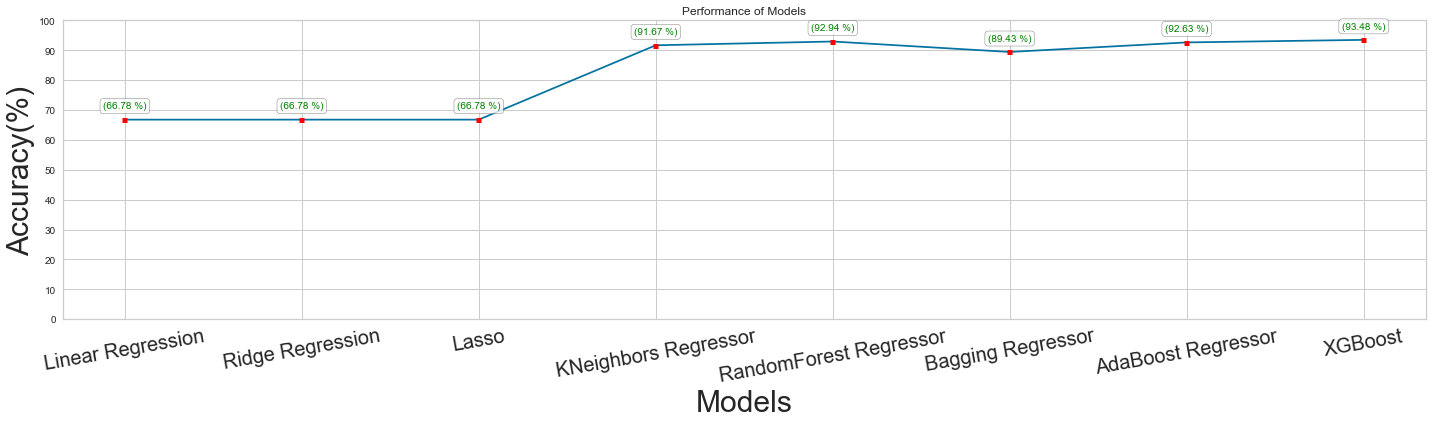

In [43]:
x = list(range(len(model_accuracy)))
y = list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('/Users/gobinathsindhuja/Desktop/Prospa_assignment/supervised_learning_project/assets/img/MachineLearning/Overall-Performance.jpg',dpi=600)
plt.show();

### Save the XGBoost Model for Deployment in Web App


In [44]:
import pickle

with open('/Users/gobinathsindhuja/Desktop/Prospa_assignment/supervised_learning_project/model/Sales_price_model_xgboost.pkl', 'wb') as file:
    pickle.dump(xg_reg, file)